# Product

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `Product`
Product of a sequence of block encodings.

Builds the block encoding $B[U_1 * U_2 * \cdots * U_n]$ given block encodings
$B[U_1], \ldots, B[U_n]$.

When each $B[U_i]$ is a $(\alpha_i, a_i, \epsilon_i)$-block encoding of $U_i$, we have that
$B[U_1 * \cdots * U_n]$ is a block encoding of $U_1 * \cdots * U_n$ with normalization
constant $\prod_i \alpha_i$, ancilla bitsize $n - 1 + \max_i a_i$, and precision
$\sum_i \alpha_i \epsilon_i$.

Following Fig. 2 in Dalzell et al. (2023), Ch. 10.2, the product is encoded by concatenating
each constituent block encoding, using a shared ancilla register and a set of flag qubits to
verify that the ancilla is left as zero after each use:
```
       ┌────────┐
  |0> ─┤        ├─     |0> ───────────X──────X────
       │        │                     │
       │ U_(AB) │  =        ┌─────┐   │   ┌─────┐
  |0> ─┤        ├─     |0> ─┤     ├──(0)──┤     ├─
       │        │           │ U_B │       │ U_A │
|Psi> ─┤        ├─   |Psi> ─┤     ├───────┤     ├─
       └────────┘           └─────┘       └─────┘
```

#### Parameters
 - `block_encodings`: A sequence of block encodings. 

#### Registers
 - `system`: The system register.
 - `ancilla`: The ancilla register (present only if bitsize > 0).
 - `resource`: The resource register (present only if bitsize > 0). 

#### References
 - [Quantum algorithms: A survey of applications and end-to-end complexities]( https://arxiv.org/abs/2310.03011). Dalzell et al. (2023). Ch. 10.2.


In [2]:
from qualtran.bloqs.block_encoding import Product

### Example Instances

In [3]:
from qualtran.bloqs.basic_gates import Hadamard, TGate
from qualtran.bloqs.block_encoding.unitary import Unitary

product_block_encoding = Product((Unitary(TGate()), Unitary(Hadamard())))

In [4]:
from qualtran.bloqs.basic_gates import Hadamard, TGate
from qualtran.bloqs.block_encoding.unitary import Unitary

u1 = Unitary(TGate(), alpha=0.5, ancilla_bitsize=2, resource_bitsize=1, epsilon=0.01)
u2 = Unitary(Hadamard(), alpha=0.5, ancilla_bitsize=1, resource_bitsize=1, epsilon=0.1)
product_block_encoding_properties = Product((u1, u2))

In [5]:
import sympy

from qualtran.bloqs.basic_gates import Hadamard, TGate
from qualtran.bloqs.block_encoding.unitary import Unitary

alpha1 = sympy.Symbol('alpha1')
a1 = sympy.Symbol('a1')
eps1 = sympy.Symbol('eps1')
alpha2 = sympy.Symbol('alpha2')
a2 = sympy.Symbol('a2')
eps2 = sympy.Symbol('eps2')
product_block_encoding_symb = Product(
    (
        Unitary(TGate(), alpha=alpha1, ancilla_bitsize=a1, epsilon=eps1),
        Unitary(Hadamard(), alpha=alpha2, ancilla_bitsize=a2, epsilon=eps2),
    )
)

#### Graphical Signature

In [6]:
from qualtran.drawing import show_bloqs
show_bloqs([product_block_encoding, product_block_encoding_properties, product_block_encoding_symb],
           ['`product_block_encoding`', '`product_block_encoding_properties`', '`product_block_encoding_symb`'])

### Call Graph

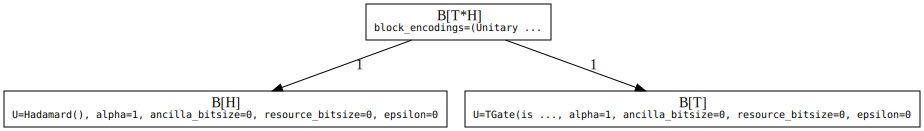

#### Counts totals:
 - `B[H]`: 1
 - `B[T]`: 1

In [7]:
from qualtran.resource_counting.generalizers import ignore_split_join
product_block_encoding_g, product_block_encoding_sigma = product_block_encoding.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(product_block_encoding_g)
show_counts_sigma(product_block_encoding_sigma)